In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load data
data = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. Distribution of Content Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.title('Distribution of Netflix Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

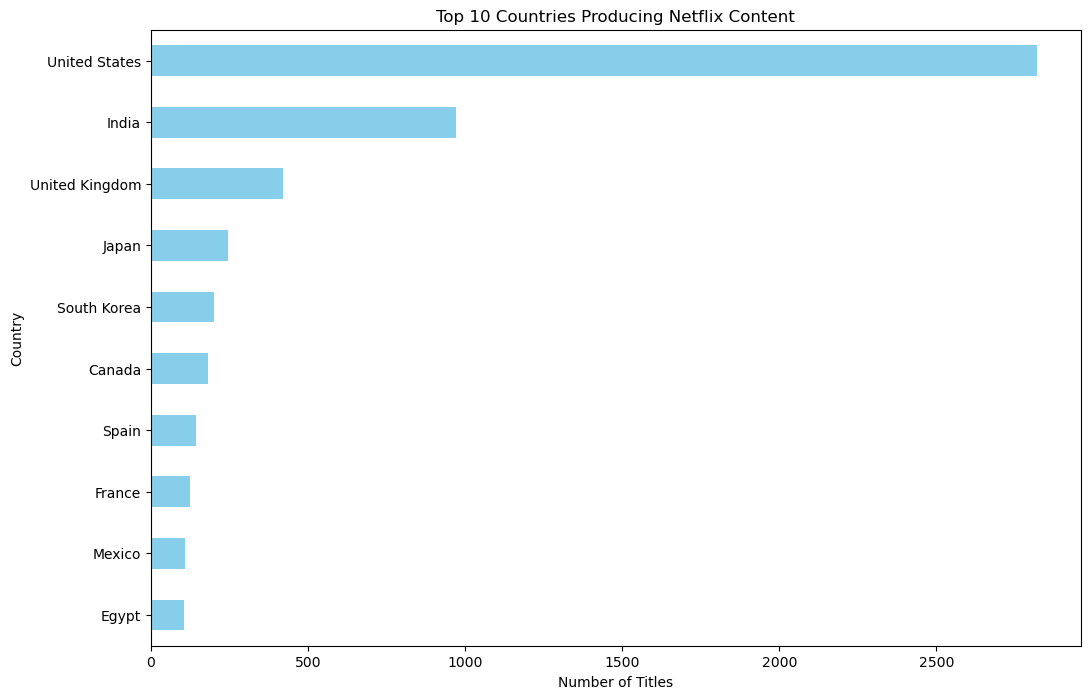

In [40]:
# 2. Top 10 Countries Producing Content
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

C:\Users\Richa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


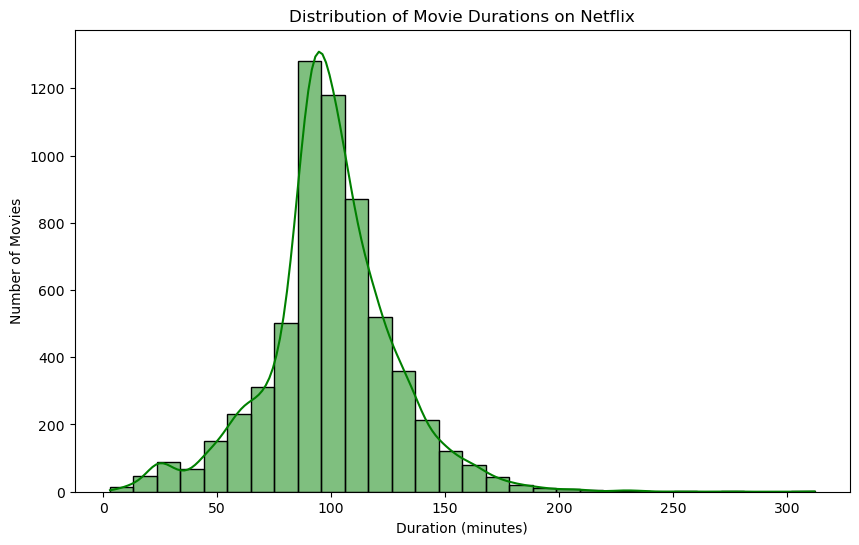

In [41]:
# 3. Duration of Movies (assuming duration is a number followed by "min")
data['duration_min'] = data[data['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['type'] == 'Movie'], x='duration_min', bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

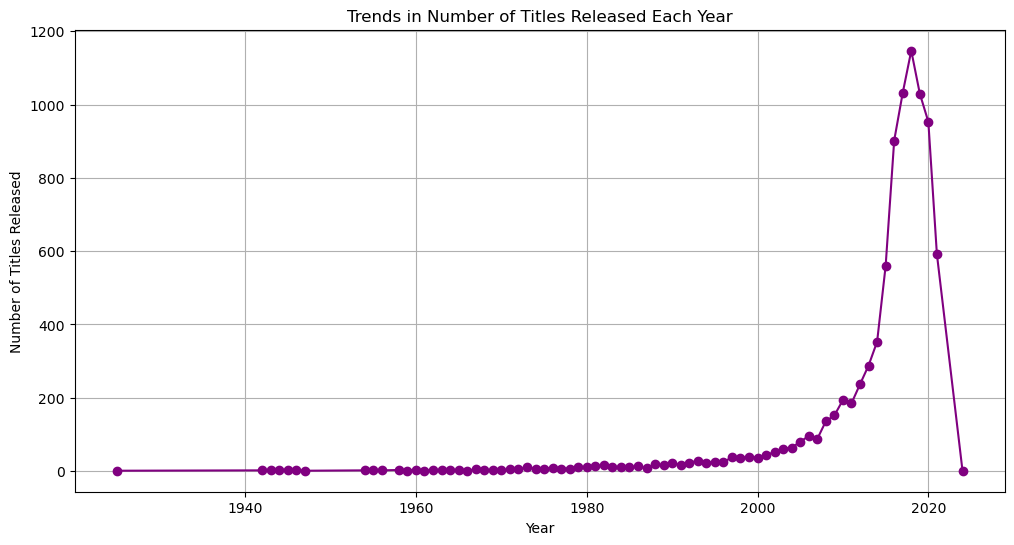

In [43]:
# 4. Release Year Trends
release_year_counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-', color='purple')
plt.title('Trends in Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.show()

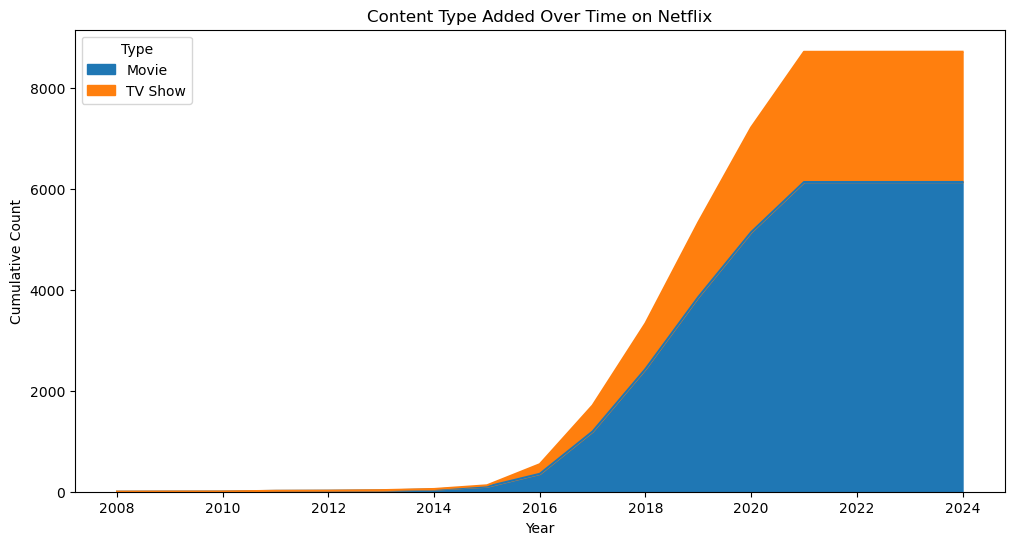

In [44]:
# 5. Content Type Over Time
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data = data.dropna(subset=['date_added'])
data['year_added'] = data['date_added'].dt.year
content_type_yearly = data.groupby(['year_added', 'type']).size().unstack().fillna(0).cumsum()
content_type_yearly.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Content Type Added Over Time on Netflix')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.legend(title='Type')
plt.show()

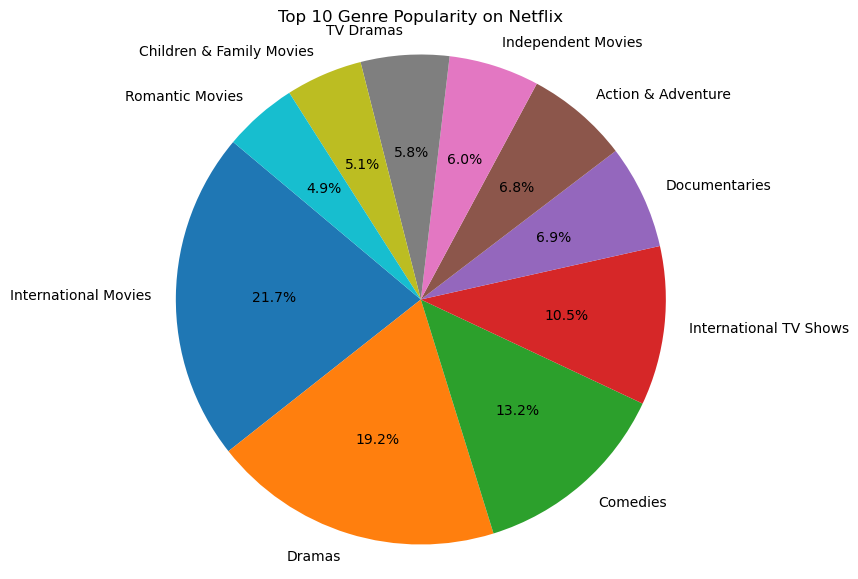

In [45]:
# 5. Genre Popularity
# Assume the 'listed_in' column contains genres separated by commas
data['genre'] = data['listed_in'].str.split(', ')
all_genres = data['genre'].explode()
genre_counts = all_genres.value_counts().head(10)  # Top 10 genres
plt.figure(figsize=(10, 7))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Genre Popularity on Netflix')
plt.show()